#线性回归

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def warm_up_exercise():
    A=np.eye(5,dtype=int)
    return A

In [3]:
print('5X5单位阵')
print(warm_up_exercise())

5X5单位阵
[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


In [4]:
data=np.loadtxt(open(r'.\machine-learning-exercise-master\coursera-machine-learning-python\ex1\ex1data1.txt','r'),delimiter=',')
X=data[:,0]
y=data[:,1]
m=len(y)

In [5]:
def plot_data(x,y):
    plt.plot(x,y,linestyle='',marker='x',color='r',label='Train data')
    plt.xlabel('Population of City in 10000')
    plt.ylabel('Profit in 10000')

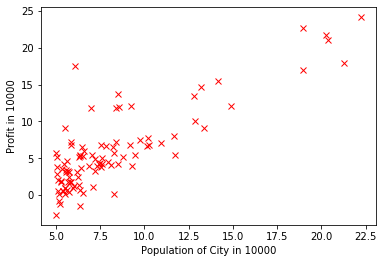

In [6]:
plt.figure()
plot_data(X,y)
plt.show()

In [7]:
#梯度下降 增加一个截距项在矩阵中
X=np.hstack((np.ones((m,1)),X.reshape(m,1)))

In [9]:
#初始化参数
theta=np.zeros(2)
theta

array([0., 0.])

In [10]:
#梯度下降的设置
iterations=1500
alpha=0.01

In [11]:
#计算损失函数
def compute_cost(x,y,theta):
    m=len(y)
    J=np.sum(np.square(x.dot(theta)-y))/(2*m)
    return J

In [13]:
#计算损失函数值
cost=compute_cost(X,y,theta)
print(cost)

32.072733877455676


In [16]:
#梯度下降寻找最佳参数
def gradient_descent(X,y,theta,alpha,num_iters):
    m=len(y)
    J_history=np.zeros(num_iters)
    for i in range(num_iters):
        theta-=alpha/m*((X.dot(theta)-y).T.dot(X))
        J_history[i]=compute_cost(X,y,theta)
    return theta,J_history

In [28]:
#输出参数值
theta,_=gradient_descent(X,y,theta,alpha,iterations)
print(theta)

[-3.89578053  1.19303361]
0.01
1500


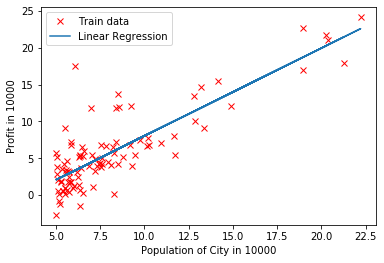

In [21]:
#输出拟合曲线
plt.figure()
plot_data(X[:,1],y)
plt.plot(X[:,1],X.dot(theta),label='Linear Regression')
plt.legend(loc='upper left',numpoints=1)
plt.show()

In [25]:
#预测
predict1=np.array([1,3.5]).dot(theta)
print(predict1)

0.28060457364122016


In [39]:
#损失函数的可视化
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)
j_vals=np.zeros((len(theta0_vals),len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        j_vals[i,j]=compute_cost(X,y,t)
j_vals=j_vals.T 
theta0_vals,theta1_vals=np.meshgrid(theta0_vals,theta1_vals)
print(j_vals)

[[328.09290555 323.26504192 318.47799046 ...  49.81156018  48.94247627
   48.11420452]
 [316.6648683  311.92025945 307.21646275 ...  46.45923561  45.67340647
   44.9283895 ]
 [305.44447299 300.7831189  296.16257698 ...  43.31455298  42.61197861
   41.95021641]
 ...
 [186.35412584 189.60197489 192.89063611 ... 691.41691065 698.62353943
  705.87098036]
 [195.06735595 198.39845977 201.77037576 ... 708.20585345 715.49573699
  722.82643269]
 [203.98822799 207.40258658 210.85775734 ... 725.20243817 732.57557648
  739.98952696]]


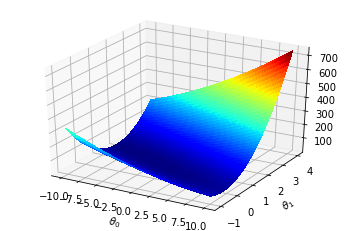

In [33]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig=plt.figure()
ax=fig.gca(projection='3d')
ax.plot_surface(theta0_vals,theta1_vals,j_vals,rstride=2,cstride=2,cmap=cm.jet,linewidth=0,antialiased=False)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
plt.show()

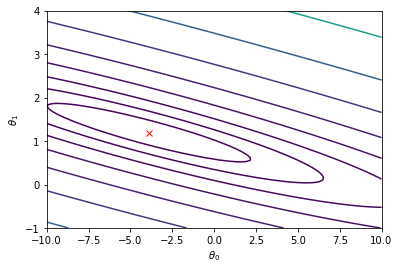

In [38]:
plt.figure()
plt.contour(theta0_vals,theta1_vals,j_vals,levels=np.logspace(-2,3,20))
plt.plot(theta[0],theta[1],linestyle='',marker='x',color='r')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.show()